# Regresión Logistica - Breast Cancer

## Importación de librerias
** Importar pandas, numpy, matplotlib,y seaborn. Luego establezca %matplotlib inline 
(Importará sklearn a medida que lo necesite.)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Recuperar los datos

** Lea en el archivo csv llamado breast_cancer como un DataFrame llamado datos**

In [4]:
datos = pd.read_csv('breast_cancer.csv')

**Revise las primeras filas, y reviselas con los métodos info() y describe().**

In [5]:
datos.head()

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [6]:
datos.describe()

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961,0.365554
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941,0.482009
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
espesor_del_grupo                  569 non-null int64
uniformidad_del_tamano_de_celda    569 non-null int64
uniformidad_de_forma_de_celda      569 non-null int64
adherencia_marginal                569 non-null int64
tamano_de_una_celula_epitelial     569 non-null int64
nucleos_desnudos                   569 non-null int64
cromatina_blanda                   569 non-null int64
nucleolos_normales                 569 non-null int64
mitosis                            569 non-null int64
clase                              569 non-null int64
dtypes: int64(10)
memory usage: 44.5 KB


## Análsis de Datos Exploratorios

In [8]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

In [9]:
#data_feats = ['diagnosis']
#final_data = pd.get_dummies(datos, columns = data_feats, drop_first=False)
final_data = datos

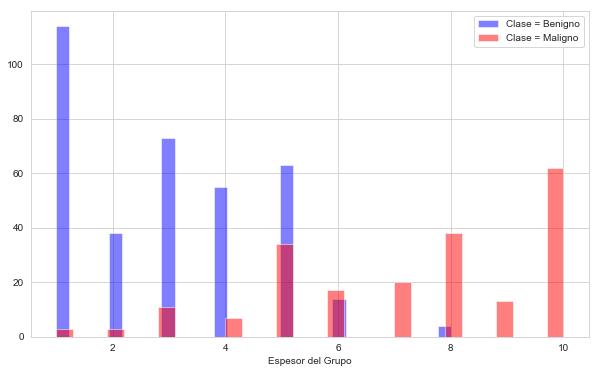

In [10]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['espesor_del_grupo'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['espesor_del_grupo'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Espesor del Grupo');

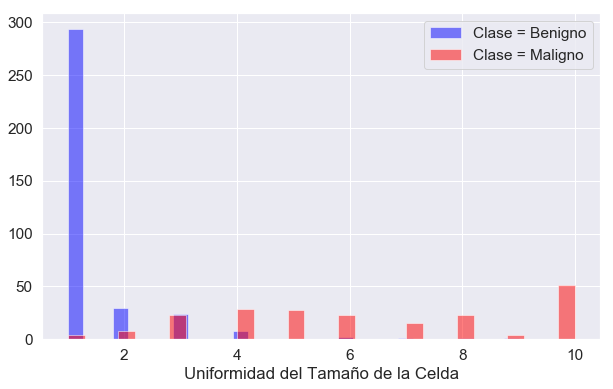

In [34]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['uniformidad_del_tamano_de_celda'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['uniformidad_del_tamano_de_celda'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Uniformidad del Tamaño de la Celda');

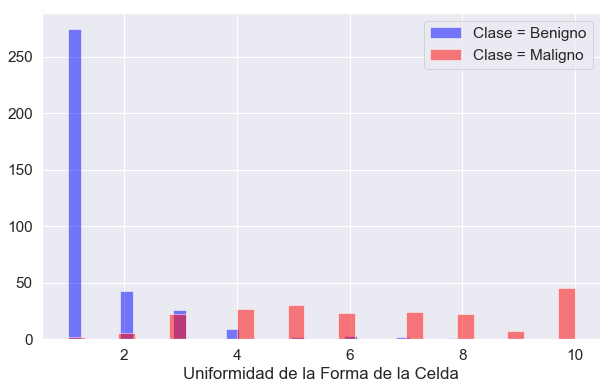

In [35]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['uniformidad_de_forma_de_celda'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['uniformidad_de_forma_de_celda'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Uniformidad de la Forma de la Celda');

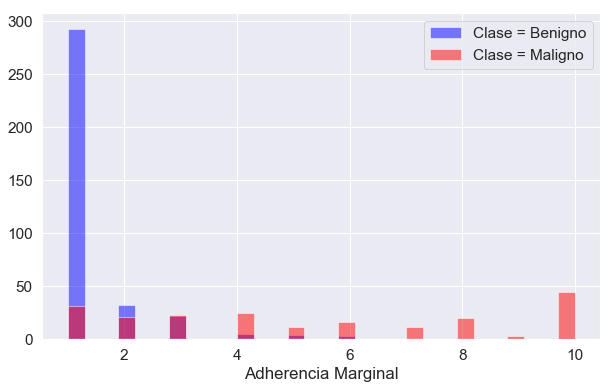

In [36]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['adherencia_marginal'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['adherencia_marginal'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Adherencia Marginal');

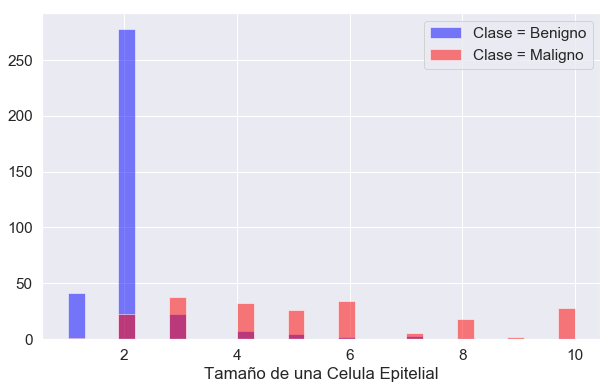

In [37]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['tamano_de_una_celula_epitelial'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['tamano_de_una_celula_epitelial'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Tamaño de una Celula Epitelial');

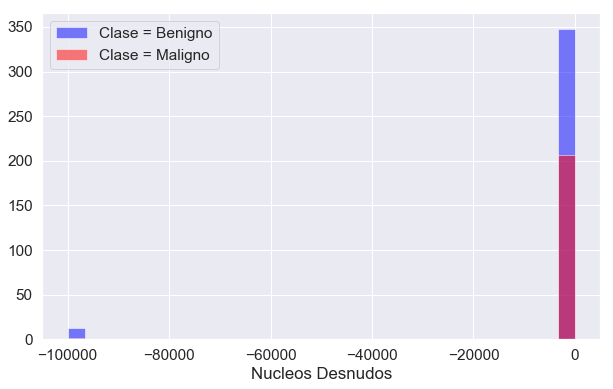

In [38]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['nucleos_desnudos'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['nucleos_desnudos'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Nucleos Desnudos');

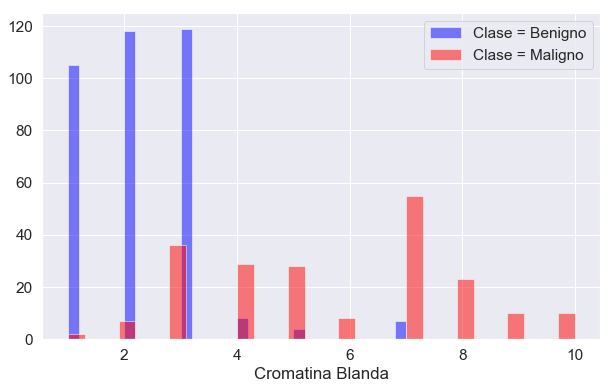

In [39]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['cromatina_blanda'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['cromatina_blanda'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Cromatina Blanda');

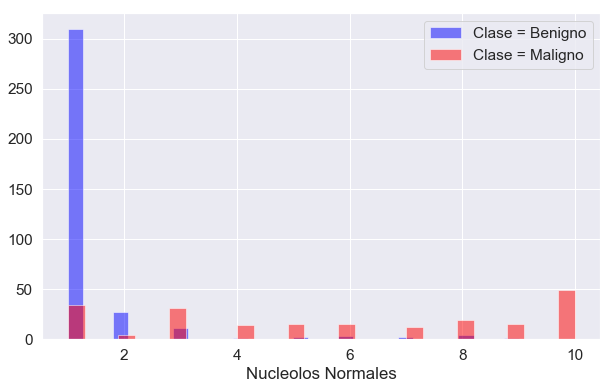

In [40]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['nucleolos_normales'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['nucleolos_normales'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Nucleolos Normales');

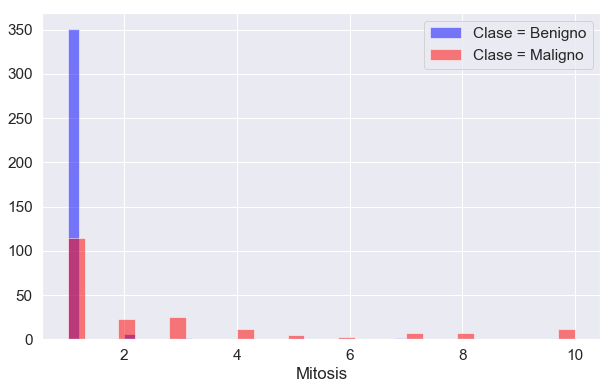

In [41]:
plt.figure(figsize=(10,6))
final_data[final_data['clase']==0]['mitosis'].hist(alpha=0.5,color='blue',
bins=30,label='Clase = Benigno')
final_data[final_data['clase']==1]['mitosis'].hist(alpha=0.5,color='red',
bins=30,label='Clase = Maligno')
plt.legend()
plt.xlabel('Mitosis');

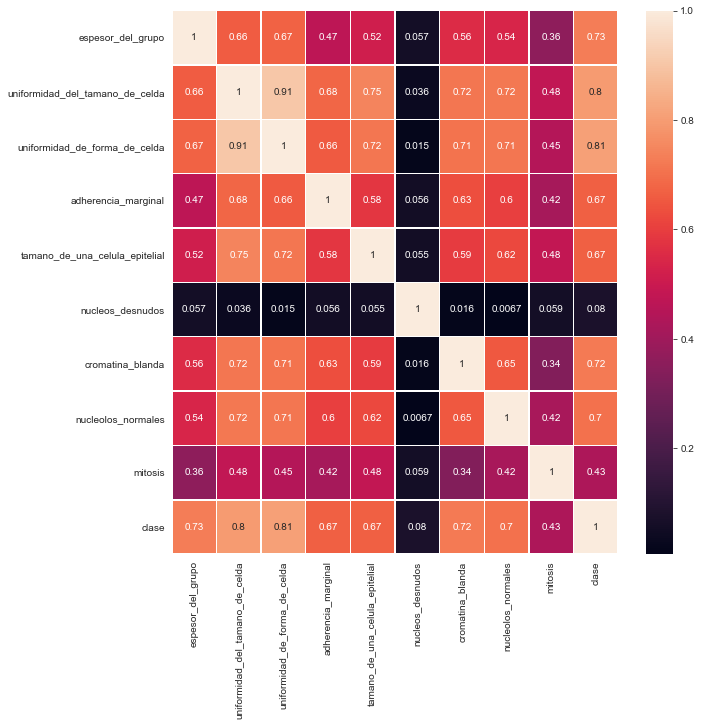

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(final_data.corr(), annot=True, linewidths=.5)

## Datos de entrenamiento y prueba

In [18]:
final_data.head()

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis,clase
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [19]:
y = final_data['clase']

In [20]:
X = final_data.drop('clase',axis=1)

** Use model_selection.train_test_split de sklearn para dividir los datos en el conjunto de entrenamiento y prueba. Establezca test_size=0.3 y random_state=101**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Entrenamiento del modelo

¡Ahora es el momento de entrenar a su modelo con nuestros datos de entrenamiento!

** Importar LinearRegression desde sklearn.linear_model **

In [23]:
from sklearn.linear_model import LogisticRegression

**Crear una instancia del modelo LinearRegression() llamado lm.**

In [24]:
lm = LogisticRegression()

** Entrenar/ajustar lm con los datos de entrenamiento.**

In [25]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicción con los datos de prueba
Ahora que hemos ajustado nuestro modelo, ¡evaluemos su rendimiento prediciendo los valores de prueba!

** Use lm.predict () para predecir el conjunto X_test de los datos.**

In [26]:
predictions = lm.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

** Cree un diagrama de dispersión de los valores de prueba reales frente a los valores predichos. **

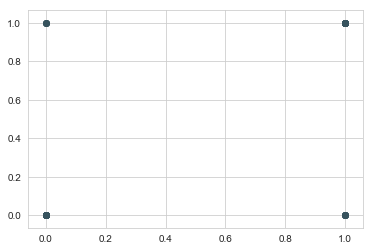

In [27]:
plt.scatter(y_test,predictions)

In [28]:
X_test

,espesor_del_grupo,uniformidad_del_tamano_de_celda,uniformidad_de_forma_de_celda,adherencia_marginal,tamano_de_una_celula_epitelial,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis
107,1,6,8,10,8,10,5,7,1
437,4,1,1,1,2,1,1,1,1
195,4,1,1,1,2,1,3,1,1
141,2,1,1,1,2,1,1,1,1
319,4,4,4,4,6,5,7,3,1
295,5,5,7,8,6,10,7,4,1
114,3,3,2,1,2,3,3,1,1
202,1,1,1,1,2,1,3,1,1
268,10,8,8,2,3,4,8,7,8
342,2,1,1,1,2,1,1,1,1


## Evaluación del modelo

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

** Calcule el error absoluto promedio, el error cuadrado promedio y la raíz del error cuadrático promedio.**

In [29]:
from sklearn.metrics import confusion_matrix

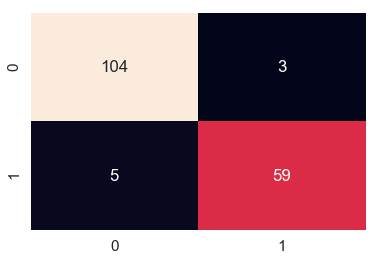

In [30]:
arregloMC = confusion_matrix(y_test,predictions)
sns.set(font_scale=1.4)
sns.heatmap(arregloMC, annot=True, fmt='g', cbar=False)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.92      0.94        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## ¡Excelente trabajo!